In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt
import csv
import datetime

In [2]:
region_icu_csv = "../Data/region_hospital_icu_covid_data.csv"

In [3]:
region_icu_df = pd.read_csv(region_icu_csv)

In [4]:
region_icu_df.head()

,date,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,2020-04-02,CENTRAL,51,39,113,0,0,0,0
1,2020-04-03,CENTRAL,57,52,141,0,0,0,0
2,2020-04-04,CENTRAL,65,57,143,0,0,0,0
3,2020-04-05,CENTRAL,65,55,174,0,0,0,0
4,2020-04-06,CENTRAL,73,58,187,0,0,0,0


In [5]:
region_icu_df.columns = region_icu_df.columns.unique()
region_icu_df.columns

Index(['date', 'oh_region', 'icu_current_covid', 'icu_current_covid_vented',
       'hospitalizations', 'icu_crci_total', 'icu_crci_total_vented',
       'icu_former_covid', 'icu_former_covid_vented'],
      dtype='object')

In [6]:
region_icu_df.oh_region.unique()

array(['CENTRAL', 'EAST', 'NORTH', 'TORONTO', 'WEST'], dtype=object)

In [7]:
region_icu_df.groupby(by=['oh_region']).sum()

,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
oh_region,,,,,,,
CENTRAL,58280,37655,284376,62731,39960,6881,4257
EAST,42420,24104,193348,46877,25977,5815,2928
NORTH,8518,3735,58510,8859,3883,435,201
TORONTO,32391,22251,136786,38065,25158,7236,4160
WEST,56399,34956,274180,62808,37824,7873,3969


In [8]:
region_icu_df.groupby(by=['oh_region']).mean()

,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
oh_region,,,,,,,
CENTRAL,56.254826,36.346525,274.494208,60.551158,38.571429,6.641892,4.109073
EAST,40.945946,23.266409,186.629344,45.248069,25.074324,5.612934,2.826255
NORTH,8.222008,3.605212,56.476834,8.551158,3.748069,0.419884,0.194015
TORONTO,31.265444,21.477799,132.032819,36.742278,24.283784,6.984556,4.015444
WEST,54.439189,33.741313,264.652510,60.625483,36.509653,7.599421,3.831081


Text(0.5, 1.0, 'Mean of Covid Patients in Each Region')

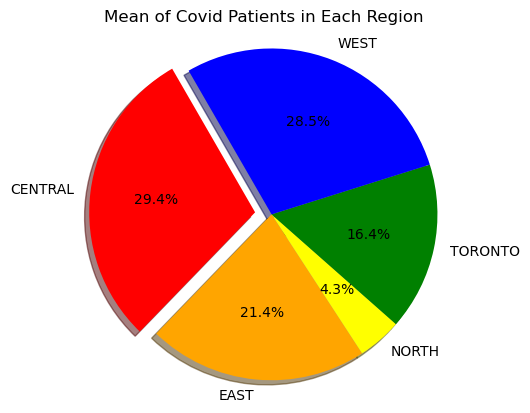

In [9]:
regions = ['CENTRAL', 'EAST', 'NORTH', 'TORONTO', 'WEST']
current_covid = [56.254826,40.945946,8.222008,31.265444,54.439189]
colors = ['red','orange','yellow','green','blue']
explode = (0.1,0,0,0,0)

plt.pie(current_covid,explode=explode,labels=regions,colors=colors,autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.title("Mean of Covid Patients in Each Region")

In [10]:
regions = ['CENTRAL', 'EAST', 'NORTH', 'TORONTO', 'WEST']
current_covid = [58280,42420,8518,32391,56399]
colors = ['red','orange','yellow','green','blue']
explode = (0.1,0,0,0,0)

Text(0.5, 1.0, 'Sum of Covid Patients in Each Region')

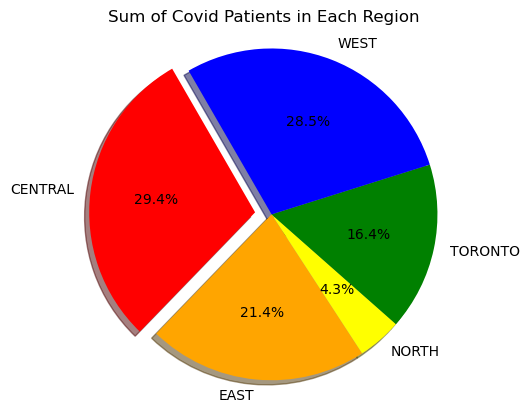

In [11]:
plt.pie(current_covid,explode=explode,labels=regions,colors=colors,autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.title("Sum of Covid Patients in Each Region")

Text(0.5, 1.0, 'Hospitalizations in Each Region')

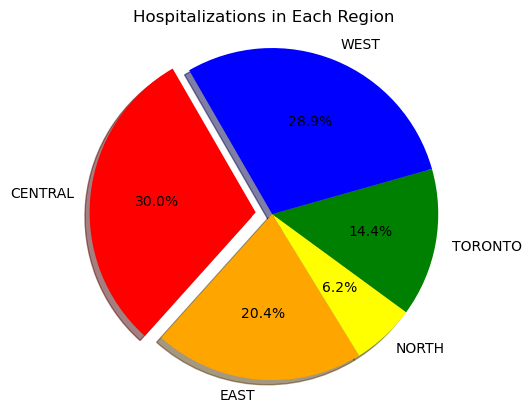

In [12]:
regions = ['CENTRAL', 'EAST', 'NORTH', 'TORONTO', 'WEST']
hospitalizations = [284376,193348,58510,136786,274180]
colors = ['red','orange','yellow','green','blue']
explode = (0.1,0,0,0,0)

plt.pie(hospitalizations,explode=explode,labels=regions,colors=colors,autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.title("Hospitalizations in Each Region")

In [13]:
#from the data, we can see that the number of hospitalizations correlate with the ICU beds 
#being used in each region

In [14]:
region_icu_df.groupby(by=['hospitalizations']).sum()

,icu_current_covid,icu_current_covid_vented,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
hospitalizations,,,,,,
0,9,7,9,7,0,0
1,11,8,18,12,7,4
2,56,32,84,47,28,15
3,74,49,134,81,60,32
4,57,29,127,64,70,35
...,...,...,...,...,...,...
1205,191,121,200,124,9,3
1211,186,120,193,125,7,5
1221,345,217,355,226,10,9


In [15]:
region_icu_df.date.unique()

array(['2020-04-02', '2020-04-03', '2020-04-04', ..., '2023-01-31',
       '2023-02-01', '2023-02-02'], dtype=object)

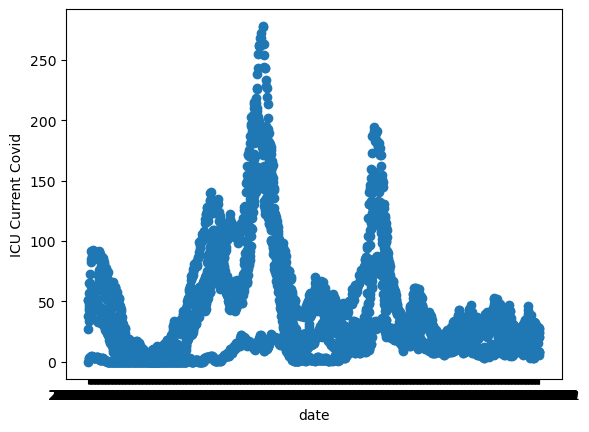

In [16]:
plt.scatter(region_icu_df['date'],region_icu_df['icu_current_covid'])
plt.xlabel("date")
plt.ylabel("ICU Current Covid")
plt.show()

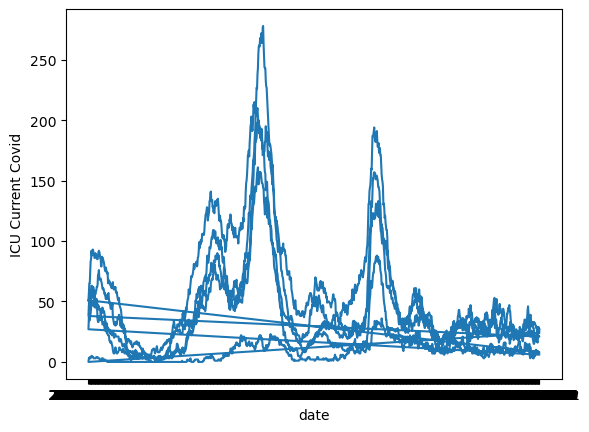

In [17]:
plt.plot(region_icu_df['date'],region_icu_df['icu_current_covid'])
plt.xlabel("date")
plt.ylabel("ICU Current Covid")
plt.show()

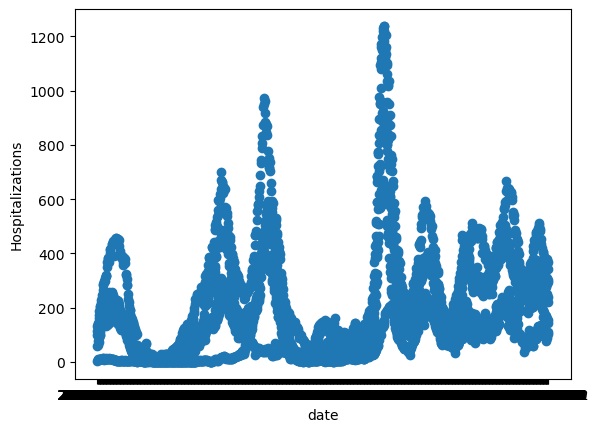

In [18]:
plt.scatter(region_icu_df['date'],region_icu_df['hospitalizations'])
plt.xlabel("date")
plt.ylabel("Hospitalizations")
plt.show()

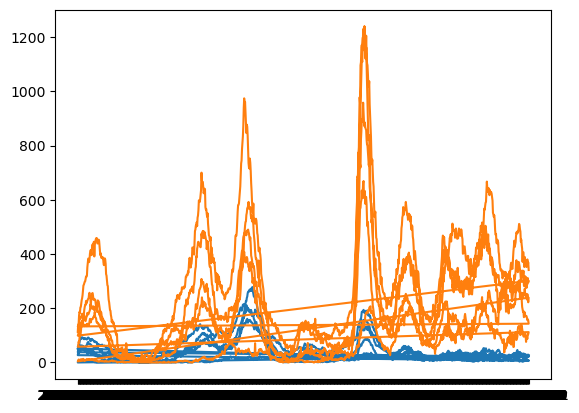

In [19]:
plt.plot(region_icu_df['date'],region_icu_df['icu_current_covid'])
plt.plot(region_icu_df['date'],region_icu_df['hospitalizations'])
plt.show()

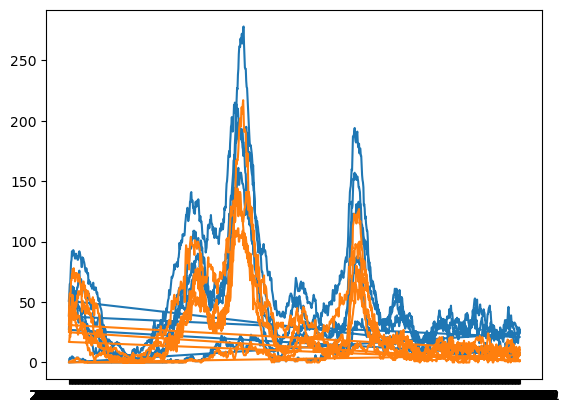

In [20]:
plt.plot(region_icu_df['date'],region_icu_df['icu_current_covid'])
plt.plot(region_icu_df['date'],region_icu_df['icu_current_covid_vented'])
plt.show()

In [21]:
total = region_icu_df['icu_current_covid'].sum()
print(total)

198008


In [22]:
total = region_icu_df['icu_current_covid_vented'].sum()
print(total)

122701


In [23]:
total = region_icu_df['hospitalizations'].sum()
print(total)

947200


Text(0, 0.5, 'Patient total')

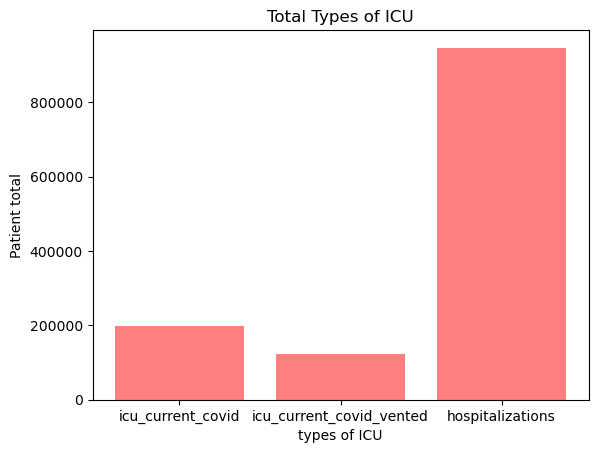

In [24]:
types = ["icu_current_covid","icu_current_covid_vented","hospitalizations"]
totals = [198008,122701,947200]

plt.bar(types, totals, color='r', alpha=0.5, align="center")
plt.title("Total Types of ICU")
plt.xlabel("types of ICU")
plt.ylabel("Patient total")